Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução a teoria das vibrações


 ##                                                              Trabalho 1 




### Aluno: Daniel Barbosa Mapurunga Matos
### Matrícula: 00312265

[1.   Introdução](#section_1)  
[2.   Captação dos dados](#section_2)  
[3. Cálculo dos deslocamentos pelo método de Duhamel](#section_3)  
[4. Plotagem do espectro de pseudoaceleração](#section_4)  
[5. Periodograma](#section_5)  
[6. Considerações finais](#section_6)  
  

--- 


In [1]:
# Importação das bibliotecas necessárias para a realização deste trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introdução<a name="section_1"></a> 

Este trabalho tem como objetivo a confecção do gráficos de resposta de um sistema, com um grau de liberdade (SDOF), a uma excitação na base: espectro de pseudoaceleração e a confecção de um periodograma. Estes serão alimentados por dados fornecidos pelo acelerômetro de um celular, a partir do aplicativo "bosch iNVH", quando este está posicionado na base de um sistema fictício, onde as características serão apresentadas posteriormente. Este trabalho está divido em:

- Captação dos dados
- Cálculo dos deslocamentos pelo método de Duhamel
- Plotagem do Espectro de pseudoaceleração
- Realização do periodograma
- Considerações finais

As características do sistema fictício estão apresentadas abaixo:



In [2]:
m  = 2.0       # massa do sistema em kg
fn = np.linspace(0.1,10,1000)     # frequencia natural Hz
Tn= 1/fn
zt = 0.01      # amortecimento
u0 = 0.        # deslocamento inicial
v0 = 0.        # velocidade inicial


## 2. Captação dos dados <a name="section_2"></a> 



Para a captação dos dados das acelerações nos eixos coordenados, utilizou-se o aplicativo "iNVH". O programa foi utilizado para medir a aceleração em uma laja de salão de festas, quando havia pessoas saltando, durante 30 segundos. Após a medição, o aplicativo exporta uma planilha no formato ".csv" que será interpretado pela classe MRPy, desenvolvida pelo Prof. Marcelo M. Rocha (https://orcid.org/0000-0001-5640-1020).


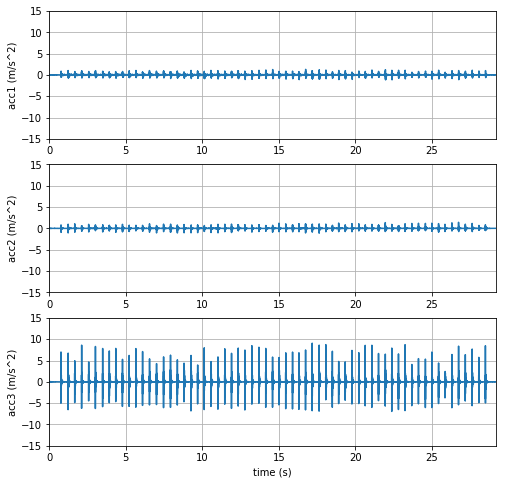

In [31]:
dados = MRPy.from_file('data/salto', form='invh').zero_mean() # importação dos dados
t    = dados.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(dados):
    
    
    plt.subplot(3, 1 ,kX+1); 
    
    plt.plot(t, acc)

    plt.xlim(0, dados.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


Para isolar apenas a vibração na direção z ( vertical), faz-se o seguinte:


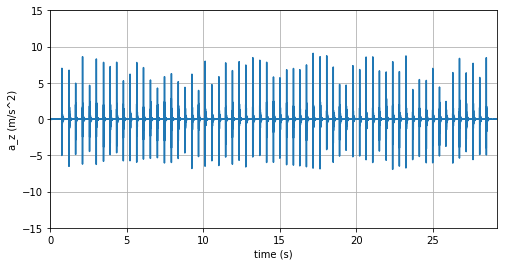

In [4]:
az = MRPy(dados[2], dados.fs)  # aceleração no eixo z (vertical), utilizou-se dados[2] para retirar o terceiro termo
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


## 3. Cálculo dos deslocamentos pelo método de Duhamel:<a name="section_3"></a> 

O método de Duhamel consiste em uma solução numérica de um sistema que recebe uma excitação externa, como o da integral abaixo, que representa a forma geral de um sistema amortecido sujeito a vibração forçada:



$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$

Esta técnica está associada a biblioteca MRPy e pode ser observada no código a seguir:


In [5]:
umax = np.zeros(fn.shape) # criando um vetor de mesmo tamanho de fn


for k, f in enumerate(fn):

    u_Dx = az.sdof_Duhamel(f, zt, u0, v0)/m  #loop para receber todos os valores máximos de u.
    umax[k] = u_Dx.max()
wn = (2*np.pi*fn) # Calculo da frequência(velocidade angular ou frequência circular )

    

    
    


## 4. Plotagem do espectro de pseudoaceleração<a name="section_4"></a> 

O espectro de pseudoaceleração consiste na plotagem de um gráfico das acelerações de pico pelo período, onde estes variam a partir de diferentes frequências naturais. Pode-se definir a aceleração de pico  por:


$$ a_{\rm pico} = w^2_{\rm n} * u_{\rm max}$$

A aceleração de pico é válida para impactos de curta duração e indicam apenas a ocorrência de valores máximos, sem levar em consideração o tempo.



aceleração de pico máxima: 0.5906395679967129


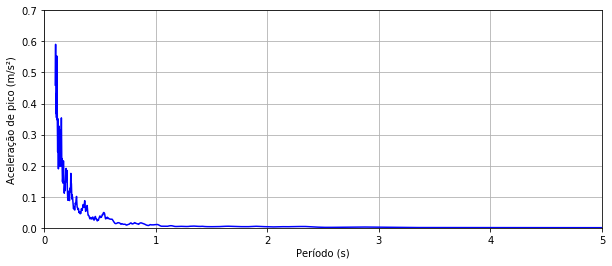

In [13]:
apico = wn*wn*umax  # cálculo da aceleração de pico 

plt.figure(3, figsize=(10,4), clear = True)
plt.plot(Tn,apico, 'b')
plt.xlim(0,5)
plt.xlabel('Período (s)')
plt.ylim(0,0.7)
plt.ylabel('Aceleração de pico (m/s²)')
plt.grid(True)
print('aceleração de pico máxima:',max(apico))



## 5. Periodograma <a name="section_5"></a> 



O periodograma nos premite observar a frequência que possui maior energia, que, portanto, estará próxima da frequência natural de vibração do sistema. A partir da classe MRPy, utilizando o método "periodogram", foi confeccionado o periodograma para os valores verticais da aceleração, capitados pelo aplicativo "iVNH", como pode ser observado nas linhas de código abaixo:

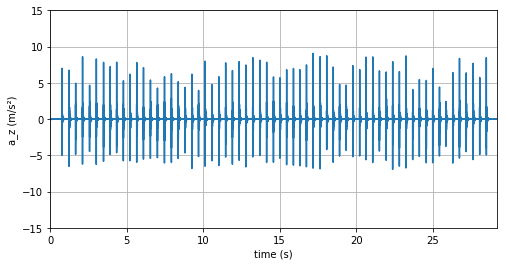

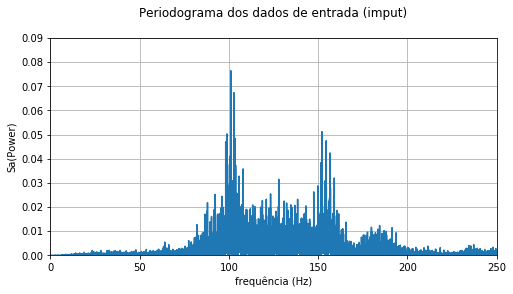

In [22]:


plt.figure(4, figsize=(8, 4), clear=True) # plotando novamente o gráfico das acelerações verticais
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s²)') 

plt.grid(True) 



Saz, fs = az.periodogram()  #aplicando a função para a montagem do periodograma.
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True);plt.title("Periodograma dos dados de entrada (imput)\n ")
plt.plot(f, Saz[0])

plt.xlim(0, 250);   plt.xlabel('frequência (Hz)') 
plt.ylim(0,  0.09);   plt.ylabel('Sa(Power)') 

plt.grid(True)



Em seguida, utilizando o mesmo procedimento, realizou-se o periodograma da saída de dados ( após a integral de Duhamel), obetendo o seguinte periodograma:

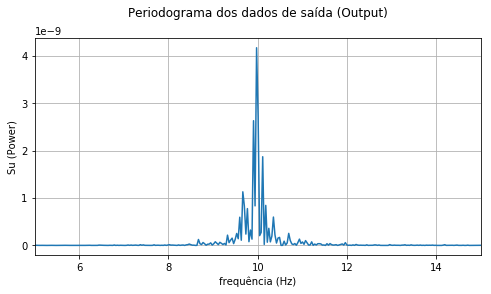

In [24]:

Su_Dx, fs = u_Dx.periodogram()  

f       = u_Dx.f_axis()

plt.figure(6, figsize=(8, 4), clear=True); plt.title("Periodograma dos dados de saída (Output)\n ")
plt.plot(f, Su_Dx[0])

plt.xlim(5, 15);   plt.xlabel('frequência (Hz)') 
plt.ylabel('Su (Power)') 

plt.grid(True)

## 6. Considerações finais <a name="section_6"></a> 



Dos dados importados pelo aplicativo , apenas a vibração na direção z(vertical) foi considerada, definindo assim um sistema com apenas um grau de liberdade (SDOF). A partir destes, utilizando o método de Duhamel, pela classe MRPy, foi possível o cálculo dos deslocamentos na direção vertical para 1000 valores de frequência natural, contidos no intervalo de 0.1 Hz e 10 Hz. Os deslocamentos máximos, quando multiplicados pelo quadrado da frequência "wn", resultam em valores de aceleração de pico, os quais serão utilizadas para a confecção do espectro de pseudoacelerações, apresentado no tópico 4 deste trabalho. O valor máximo encontrado para a aceleração de pico foi de, aproximadamente, 0.59 m/s². Utilizando as mesmas acelerações verticais, foi plotado o periodograma deste sistema, possibilitando, assim, a descoberta de uma das frequências naturais de vibração deste sistema, que está próxima do valor de 100 Hz.